# Mean, Median, and Mode

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
data = np.loadtxt("data/dataset.txt")

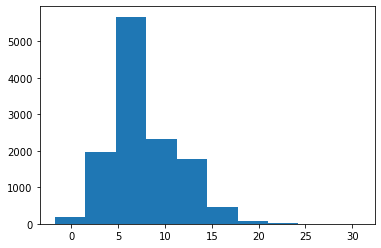

In [3]:
plt.hist(data);

---
## Center

In [13]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    
    return summed / len(xs)

print(get_mean([3, 5, 2, 6]))

4.0


In [14]:
mean = np.mean(data)

---
## Median

Medians are not sensitive to outliers. However, means are sensitive to outliers.

In [15]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])

print(get_median([7, 7, 3, 1, 4, 5]))

4.5


---
## Mode

The mode is not sensitive to outliers.

In [16]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_idx = np.argmax(counts)
    return values[max_count_idx]

print(get_mode([1, 7, 2, 5, 3, 3, 8, 3, 2]))

3


In [17]:
hist, edges = np.histogram(data, bins=10000)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.41347135


In [21]:
kde = stats.gaussian_kde(data)
x_vals = np.linspace()

TypeError: _linspace_dispatcher() missing 2 required positional arguments: 'start' and 'stop'

---
## Variance

The variance of a distribution is a measure of how much the distribution spreads out around the mean. A more formal definition is that it is the expected value of the squared deviation from the mean

In [22]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)

print(get_variance([1, 2, 3, 4, 5]))

2.5


In [23]:
variance = np.var(data, ddof=1)
print(variance)

13.137626632694301


---
## Standard Deviation

In [24]:
std = np.std(data)

print(std, std **2)

3.6244414221454435 13.136575622563685


---
## Gaussian / Normal Approximation

Use the mean and the standard deviation to dervive the Guassian Approximation

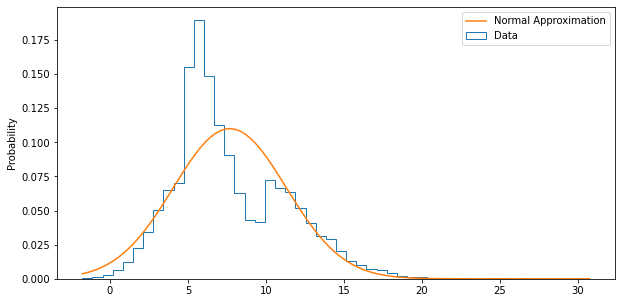

In [25]:
xs = np.linspace(data.min(), data.max(), 100)
ys = stats.norm.pdf(xs, loc=mean, scale=std)

plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal Approximation")
plt.legend()
plt.ylabel("Probability");

---
## Skewness

**Skewness** is the cubic distance from the mean normalized to some value related to the variance of the distribution.

It is a measure of the asymmetry.

In [26]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean) ** 3
    return (summed / len(xs)) / (var ** 1.5)

In [27]:
# Symmetric distribution should have 0 skewness

print(get_skewness([1, 2, 3, 4, 5]))

0.0


In [28]:
skewness = stats.skew(data)

print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


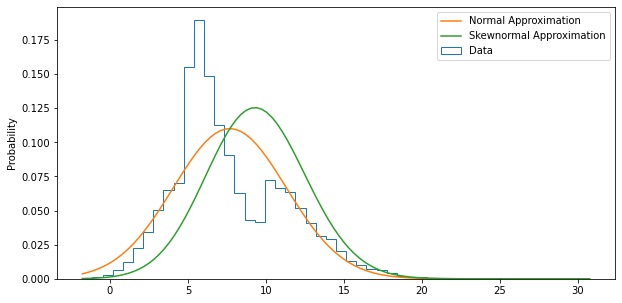

In [29]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = stats.norm.pdf(xs, loc=mean, scale=std)
ys2 = stats.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal Approximation")
plt.plot(xs, ys2, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability");

Skewnormal is a less appropriate approximation. The cause is due the skewness changing the mean. Must input the mean that correct for the skewness.

#### Use SciPy to fix the problem caused by skewness

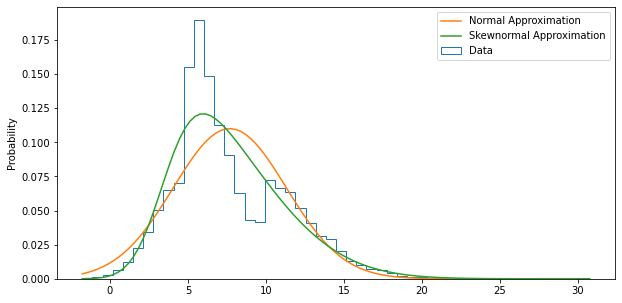

In [30]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = stats.norm.pdf(xs, loc=mean, scale=std)
ps = stats.skewnorm.fit(data)
ys2 = stats.skewnorm.pdf(xs, *ps)

plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal Approximation")
plt.plot(xs, ys2, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability");

---
## Kurtosis

Less a measure of the asymmetry of the information. More appropriately used to encapsulate the data's information/distribution.

In [34]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / len(xs)) / (var ** 2)

In [35]:
print(get_kurtosis([1, 2, 3, 4, 5]))

1.7


In [33]:
# fisher normalizes the distribution
# Kertosis of a normal distribution equals 3.
kurtosis = stats.kurtosis(data, fisher=False)
print(get_kurtosis(data), kurtosis)

3.551753849730955 0.5517538497309498
